In [6]:
%matplotlib inline
import svmpy
import logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
import argh

In [15]:
def example(num_samples=10, num_features=2, grid_size=20, filename="svm.pdf"):
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    trainer = svmpy.SVMTrainer(svmpy.Kernel.linear(), 0.1)
    predictor = trainer.train(samples, labels)
    print "Training Done"
    plot(predictor, samples, labels, grid_size, filename)



In [16]:
def plot(predictor, X, y, grid_size, filename):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                         np.linspace(y_min, y_max, grid_size),
                         indexing='ij')
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 cmap=cm.Paired,
                 levels=[-0.001, 0.001],
                 extend='both',
                 alpha=0.8)
    plt.scatter(flatten(X[:, 0]), flatten(X[:, 1]),
                c=flatten(y), cmap=cm.Paired)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.savefig(filename)
    plt.show()

     pcost       dcost       gap    pres   dres
 0: -2.2897e+01 -1.9520e+01  6e+02  2e+01  1e-15
 1: -4.3936e+00 -1.8357e+01  4e+01  1e+00  1e-15
 2: -2.8989e+00 -9.4311e+00  7e+00  2e-16  1e-15
 3: -3.6233e+00 -4.4404e+00  8e-01  2e-16  6e-16
 4: -4.0093e+00 -4.1381e+00  1e-01  2e-16  4e-16
 5: -4.0734e+00 -4.0861e+00  1e-02  2e-16  4e-16
 6: -4.0799e+00 -4.0802e+00  4e-04  3e-16  4e-16
 7: -4.0801e+00 -4.0801e+00  4e-06  2e-16  5e-16
Optimal solution found.
Training Done


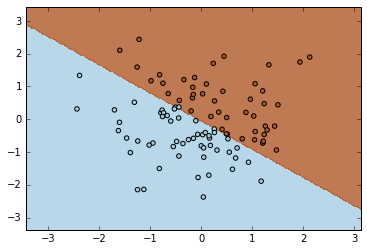

In [17]:
example(num_samples=100, num_features=2, grid_size=200, filename="svm.pdf")